In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import RidgeCV,LinearRegression,SGDRegressor,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Fish.csv")

In [3]:
dataset.head(5)

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
dataset.describe()

,weight,length1,length2,length3,height,width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
one_hot_enc = pd.get_dummies(dataset.species, prefix='species')
fdata = pd.concat([dataset,one_hot_enc],axis=1).drop(columns=["species"])
fdata

,weight,length1,length2,length3,height,width,species_Bream,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


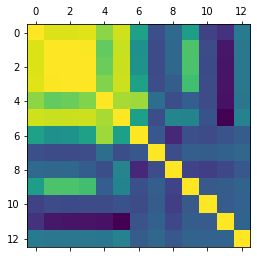

In [6]:
cord = fdata.corr()
plt.matshow(cord)
plt.show()

In [59]:
def feature_ext(fdata):
    y = fdata['weight']
    y=y.astype('int')
    X = fdata.drop(columns=['weight']) # ,'length1','length2','length3'])
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    #return X_train, X_test, y_train, y_test
    return X,y

In [60]:
def poly_feature(features, degree_):
    poly = PolynomialFeatures(degree=degree_)
    return poly.fit_transform(features)

In [61]:
def linear_regress(X,y):
    regressed_model = LinearRegression()
    return regressed_model.fit(X, y)

In [62]:
def model_metrics(model,test_x,test_y):
    y_pred = model.predict(test_x)
    return [y_pred, model.coef_, mean_squared_error(test_y, y_pred), r2_score(test_y, y_pred)]

In [63]:
def plot_pred(predictions,label):
    plt.scatter(predictions, label, color="blue")
    plt.plot(label, label, color="red", linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.title("Expected vs The Model")
    plt.show()

In [86]:
def save_model(fname,clf):
    pickle.dump(clf, open(fname, 'wb'))

In [65]:
X,y = feature_ext(fdata)

In [81]:
X_ = poly_feature(X, 4)
# X_test_ = poly_feature(X_test, 1)

In [82]:
model = linear_regress(X_, y)

In [83]:
metrics = model_metrics(model,X_,y)
print(metrics[2:4])

[7.861635422246321, 0.9999382847612568]


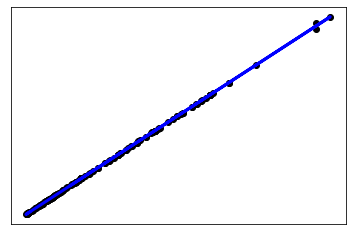

In [85]:
plot_pred(metrics[0],y)

In [87]:
save_model("final_model.sav",model)